In [1]:
from google.colab import files

In [2]:
# Importer le fichier Excel
uploaded = files.upload()

Saving export_date.csv to export_date.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("export_date.csv")

In [5]:
df = pd.read_csv("export_date.csv", sep=";")

In [6]:
df.head()

,DAY,NOMBRE_ACHATS
0,22-nov-11,151
1,02-DEC-10,143
2,17-nov-11,140
3,29-nov-11,138
4,06-oct-11,137


In [7]:
import pandas as pd

# Dictionnaire pour remplacer les mois en français par les mois en anglais
months_fr_to_en = {
    'janv': 'jan', 'févr': 'feb', 'mars': 'mar', 'avr': 'apr', 'mai': 'may', 'juin': 'jun',
    'juil': 'jul', 'août': 'aug', 'sept': 'sep', 'oct': 'oct', 'nov': 'nov', 'déc': 'dec'
}

# Fonction pour convertir les dates en gérant plusieurs formats et en supprimant les espaces
def convert_date(date_str):
    if pd.isna(date_str):  # Gérer les valeurs NaN
        return pd.NaT

    # Si la valeur est déjà un Timestamp, la retourner telle quelle
    if isinstance(date_str, pd.Timestamp):
        return date_str

    # Si la valeur est déjà une chaîne de caractères
    if isinstance(date_str, str):
        date_str = date_str.strip()  # Nettoyer les espaces avant et après

        # Remplacer les mois en français par leur équivalent en anglais
        for fr_month, en_month in months_fr_to_en.items():
            date_str = date_str.replace(fr_month, en_month)

        # Liste des formats à tester
        date_formats = ['%d-%b-%y', '%d/%m/%Y', '%d-%b-%Y', '%d-%b-%y']

        for date_format in date_formats:
            try:
                # Essayer de convertir la date avec chaque format
                return pd.to_datetime(date_str, format=date_format, errors='raise')
            except (ValueError, TypeError):  # Si la conversion échoue, passer au format suivant
                continue

        # Si aucun format n'a fonctionné, essayer une conversion sans format spécifique
        try:
            return pd.to_datetime(date_str, errors='raise', dayfirst=True)
        except (ValueError, TypeError):
            return pd.to_datetime(date_str, errors='coerce', dayfirst=True)

    return pd.NaT  # Retourner NaT si la valeur n’est pas une chaîne ou Timestamp

# Exemple d'application de la fonction à la colonne 'DAY' du dataframe
df['DAY'] = df['DAY'].apply(convert_date)

# Vérifier les types de données de la colonne 'DAY'
print(df['DAY'].apply(type).value_counts())

# Afficher les lignes où la conversion a échoué
print(df[df['DAY'].isna()])  # Affiche les lignes où la conversion a échoué

DAY
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    305
Name: count, dtype: int64
Empty DataFrame
Columns: [DAY, NOMBRE_ACHATS]
Index: []


In [8]:
print(df[df['DAY'].isna()])  # Affiche les lignes où la conversion a échoué

Empty DataFrame
Columns: [DAY, NOMBRE_ACHATS]
Index: []


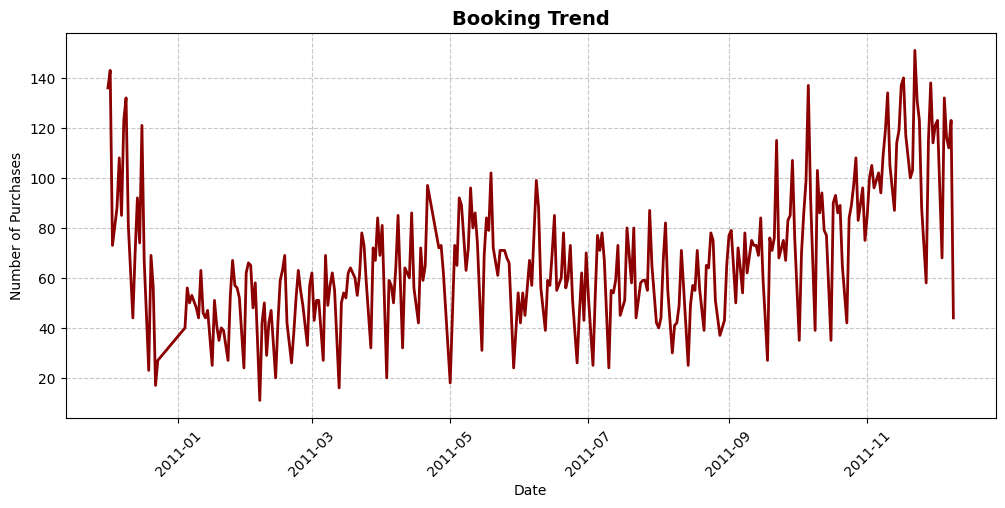

<ipython-input-14-bea9a247784d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchases_per_day.index, y=avg_purchases_per_day.values, palette="coolwarm")


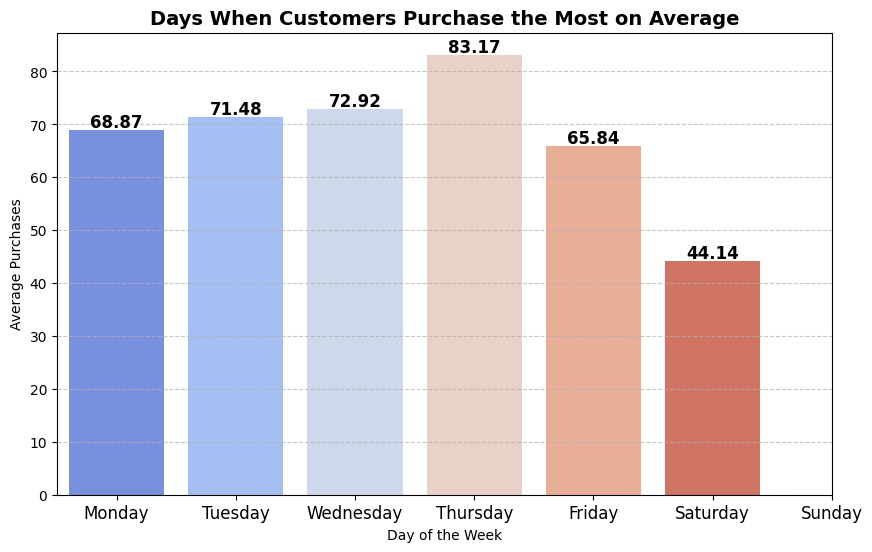

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vérifier si df existe
if 'df' not in locals():
    print("❌ Erreur : Assurez-vous que le DataFrame 'df' est bien défini dans votre environnement.")
else:
    # Convertir la colonne DAY en format datetime
    df['DAY'] = pd.to_datetime(df['DAY'], errors='coerce')

    # Extraire le jour de la semaine (Lundi=0, Dimanche=6)
    df["Jour_Semaine"] = df["DAY"].dt.dayofweek
    jours_semaine = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    # ---- 1. Graphique Booking Trend ----
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df["DAY"], y=df["NOMBRE_ACHATS"], color="darkred", linewidth=2)
    plt.title("Booking Trend", fontsize=14, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Number of Purchases")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

    # ---- 2. Graphique des jours avec le plus d'achats en moyenne ----
    # Calculer la moyenne des achats par jour de la semaine
    avg_purchases_per_day = df.groupby("Jour_Semaine")["NOMBRE_ACHATS"].mean()

    # Tracer le graphique en barres
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_purchases_per_day.index, y=avg_purchases_per_day.values, palette="coolwarm")

    # Ajouter les labels et le titre
    plt.xticks(ticks=range(7), labels=jours_semaine, fontsize=12)
    plt.ylabel("Average Purchases")
    plt.xlabel("Day of the Week")
    plt.title("Days When Customers Purchase the Most on Average", fontsize=14, fontweight="bold")

    # Ajouter les annotations sur les barres
    for i, v in enumerate(avg_purchases_per_day.values):
        plt.text(i, v + 0.5, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()